# Advanced Natural Language Processing
# Programming Assignment 02

### Instructions:
-  Please rename the file name as `Assignment3_[name]_[student_ID]`<br>
-  Write clear and well commented code<br>
-  A viva may also be conducted.<br>
-  All solutions should be written in this notebook.
-  The output of all cells should be present in the version of the notebook you submit.
- You are not permitted to use any NLP or ML toolkits and libraries unless mentioned in the question statement.


### Submission Instructions

Submit your code as a zip file `Assignment3_[name]_[student_ID]` containing the notebook file (.ipynb), .html file **and** python file (.py).



---



### This aim of assigment is to give you hands-on experience with different types of Embeddings.

This assignment will give you hands-on experience with different types of word embeddings:

*   Frequency-based: TF-IDF (baseline)
*   Prediction-based (static): Word2Vec, GloVe, FastText
*   Sentence-level: Doc2Vec


## Part 0: Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset and Pre-process

We will use train_data to train the models, validation_data to find the best tuned parameters for the classifier, and fially test set to test the models.

In [2]:
train_data = pd.read_csv('train_data.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
val_data = pd.read_csv('validation_data.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
test_data = pd.read_csv('test_data.csv', engine='python', encoding='utf-8', on_bad_lines='skip')

In [3]:
print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_data)}")
print(f"\nColumn names: {train_data.columns.tolist()}")
print(f"\nClasses/Topics: {train_data['topics'].unique()}")
print(f"Number of classes: {len(train_data['topics'].unique())}")

# Display some samples
print("\n" + "="*50)
print("Sample Headlines")
print("="*50)
for idx in range(3):
    print(f"\nHeadline {idx+1}: {train_data.iloc[idx]['headlines']}")
    print(f"Topic: {train_data.iloc[idx]['topics']}")

# Check for missing values
print("\n" + "="*50)
print("Data Quality Check")
print("="*50)
print(f"Missing values in train: {train_data.isnull().sum().sum()}")
print(f"Missing values in validation: {val_data.isnull().sum().sum()}")
print(f"Missing values in test: {test_data.isnull().sum().sum()}")


Training samples: 9600
Validation samples: 1200
Test samples: 1200

Column names: ['Unnamed: 0', 'headlines', 'topics']

Classes/Topics: ['palestine' 'microsoft' 'economy' 'obama']
Number of classes: 4

Sample Headlines

Headline 1: There is a long tradition of drama in Palestinian culture, but it is not a written one. This point is made by Nathalie Handal in her excellent and
Topic: palestine

Headline 2: Microsoft's new high-end Office 365 plan, E5, has gone live with pricing around 50 per cent higher than the existing E3 plan, which remains
Topic: microsoft

Headline 3: Bhaskar Pramanik, Chairman, Microsoft India, said, &quot;Cloud and mobile technologies are already galvanizing Indian industry. 
Topic: microsoft

Data Quality Check
Missing values in train: 1
Missing values in validation: 0
Missing values in test: 0


## Part 1: TF-IDF + Logistic Regression

TF-IDF is a numerical statistic that reflects how important a word is to a document in a collection. It increases proportionally to the number of times a word appears in a document (Term Frequency), but is offset by the frequency of the word in the entire corpus (Inverse Document Frequency). This helps to adjust for the fact that some words appear more frequently in general (like "the", "is", "at"). Words that appear frequently in a specific document but rarely across all documents get higher TF-IDF scores, making them good features for classification.


Logistic Regression is a statistical model used for binary or multi-class classification. Despite its name, it's a classification algorithm, not a regression algorithm. It works by calculating the probability that an instance belongs to a particular class using a logistic (sigmoid) function. For multi-class problems like topic classification, it uses a "one-vs-rest" or "multinomial" approach. It's simple, interpretable, and works well as a baseline for text classification tasks when combined with TF-IDF features.

Before diving into embeddings, let's establish a baseline using traditional TF-IDF features with Logistic Regression.

Note: Be sure to pre-process the datasets to avoid errors.


PART 1: TF-IDF + LOGISTIC REGRESSION BASELINE

Creating TF-IDF representations...
TF-IDF feature shape: (9600, 5000)
Vocabulary size: 5000

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation F1 Score: 0.9707

TF-IDF + Logistic Regression Results:
Accuracy: 0.9317
F1 Score (Macro): 0.9270
F1 Score (Weighted): 0.9316

Classification Report:
              precision    recall  f1-score   support

     economy       0.91      0.95      0.93       458
   microsoft       0.96      0.94      0.95       327
       obama       0.93      0.92      0.92       300
   palestine       0.95      0.86      0.90       115

    accuracy                           0.93      1200
   macro avg       0.94      0.92      0.93      1200
weighted avg       0.93      0.93      0.93      1200



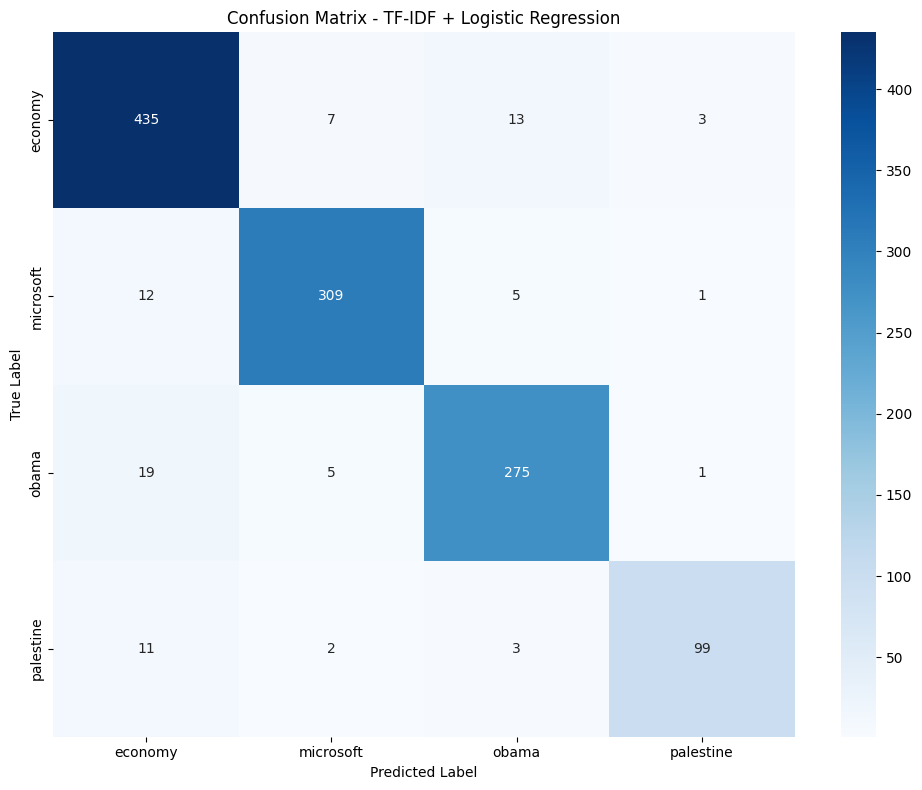


✓ Baseline model trained successfully!


In [4]:
print("\n" + "="*70)
print("PART 1: TF-IDF + LOGISTIC REGRESSION BASELINE")
print("="*70)

# Handle missing values by filling them with an empty string
train_data['headlines'] = train_data['headlines'].fillna('')
val_data['headlines'] = val_data['headlines'].fillna('')
test_data['headlines'] = test_data['headlines'].fillna('')

# Create TF-IDF representations
print("\nCreating TF-IDF representations...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,
    max_df=0.8
)

# Fit on training data and transform all sets
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['headlines'])
X_val_tfidf = tfidf_vectorizer.transform(val_data['headlines'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['headlines'])

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# Extract labels
y_train = train_data['topics']
y_val = val_data['topics']
y_test = test_data['topics']

# Train Logistic Regression
print("\nTraining Logistic Regression...")
lr_classifier = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0
)
lr_classifier.fit(X_train_tfidf, y_train)

# Predict on validation set (for tuning)
y_val_pred = lr_classifier.predict(X_val_tfidf)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"Validation F1 Score: {val_f1:.4f}")

# Predict on test set
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Evaluate
print("\n" + "="*50)
print("TF-IDF + Logistic Regression Results:")
print("="*50)
# You need to import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score (Macro): {f1_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"F1 Score (Weighted): {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

baseline_f1_weighted = f1_score(y_test, y_pred_lr, average='weighted')
baseline_f1_macro = f1_score(y_test, y_pred_lr, average='macro')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_classifier.classes_,
            yticklabels=lr_classifier.classes_)
plt.title('Confusion Matrix - TF-IDF + Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n✓ Baseline model trained successfully!")

## Prediction based Embeddings

For prediction based embeddings we will explore Word2Vec, Glove(pre-trained), FastText(sub-word), Doc2Vec(sentence embeddings).

Use the headlines.txt file to train the Word2Vec model. You can also read the paper ["Efficient Estimation of Word Representations in Vector Space"](https://arxiv.org/pdf/1301.3781.pdf) to get a better understanding.

Use the [gensim](https://radimrehurek.com/gensim/models/word2vec.html) library to train the Word2Vec model. Keep the dimensionality low [50 - 150], and find out which window size is good enough by training the classification model.

In [5]:
!pip install gensim
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.8 MB/s eta 0:00:00


## Part 2: Word2Vec Embeddings

Word2Vec is a prediction-based method for learning word embeddings developed by Mikolov et al. at Google in 2013. Unlike TF-IDF which creates sparse vectors based on word counts, Word2Vec learns dense vector representations where semantically similar words have similar vectors. It works on the principle: "you shall know a word by the company it keeps" - words that appear in similar contexts tend to have similar meanings.

Word2Vec has two main architectures:

*   CBOW (Continuous Bag of Words): Predicts a target word from its context words
*   Skip-gram: Predicts context words given a target word (works better for smaller datasets)

The magic of Word2Vec is that it captures semantic relationships.

For example, vector("king") - vector("man") + vector("woman") ≈ vector("queen").

You'll train your own Word2Vec model to understand how embeddings are learned from data.

#### Step 1: Prepare Training Data

In [6]:
import string # Import the string module

# Load and preprocess headlines.txt
def load_and_preprocess_headlines(file_path):
    """
    Load headlines from file and preprocess them.
    Tokenize and clean the text.
    """
    sentences = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                # Lowercase
                line = line.lower()
                # Remove punctuation
                line = line.translate(str.maketrans('', '', string.punctuation))
                # Tokenize
                tokens = line.split()
                # Remove very short tokens
                tokens = [t for t in tokens if len(t) > 1]

                if tokens:  # Only add non-empty sentences
                    sentences.append(tokens)

    return sentences

# Load headlines
sentences = load_and_preprocess_headlines('headlines.txt')
print(f"Total headlines for training: {len(sentences)}")
print(f"Sample sentence: {sentences[0][:10]}")  # First 10 words of first headline

Total headlines for training: 68224
Sample sentence: ['obama', 'lays', 'wreath', 'at', 'arlington', 'national', 'cemetery', 'president', 'barack', 'obama']


#### Step 2: Train Word2Vec Models
Experiment with at least 2 different embedding sizes:
*   Size 1: 50-100 dimensions
*   Size 2: 100-150 dimensions

Try different window sizes (e.g., 5, 7, 10) and keep the one that performs best.

In [7]:
# Train Word2Vec Model - Configuration 1
embedding_size_1 = 100  # TODO: Choose size
window_size_1 = 5       # TODO: Experiment with this

w2v_model_1 = Word2Vec(
    sentences=sentences,
    vector_size=embedding_size_1,
    window=window_size_1,
    min_count=2,
    workers=4,
    sg=1,  # Use skip-gram (sg=1) or CBOW (sg=0)
    epochs=10
)

print(f"Word2Vec Model 1 trained with {embedding_size_1} dimensions")
print(f"Vocabulary size: {len(w2v_model_1.wv)}")

# Test the model
test_words = ['election', 'economy', 'sports', 'technology']
for word in test_words:
    if word in w2v_model_1.wv:
        similar = w2v_model_1.wv.most_similar(word, topn=5)
        print(f"\nWords similar to '{word}':")
        for w, score in similar:
            print(f"  {w}: {score:.4f}")

Word2Vec Model 1 trained with 100 dimensions
Vocabulary size: 29883

Words similar to 'election':
  elections: 0.7435
  portugese: 0.7003
  runoff: 0.6857
  primaries: 0.6849
  presidential: 0.6809

Words similar to 'economy':
  ontarios: 0.6598
  recovering: 0.6374
  secondbiggest: 0.6370
  manilathe: 0.6363
  spillover: 0.6361

Words similar to 'sports':
  qhd: 0.6207
  tmz: 0.6199
  intimate: 0.6101
  acclaimed: 0.5940
  dual: 0.5909

Words similar to 'technology':
  aligns: 0.6847
  ict: 0.6818
  seattlebased: 0.6771
  palestinebased: 0.6688
  iiit: 0.6681


In [8]:
# Train Word2Vec Model - Configuration 2
embedding_size_2 = 150  # TODO: Choose size
window_size_2 = 7       # TODO: Experiment with this

w2v_model_2 = Word2Vec(
    sentences=sentences,
    vector_size=embedding_size_2,
    window=window_size_2,
    min_count=2,
    workers=4,
    sg=1,  # Use skip-gram (sg=1) or CBOW (sg=0)
    epochs=10
)

print(f"Word2Vec Model 2 trained with {embedding_size_2} dimensions")
print(f"Vocabulary size: {len(w2v_model_2.wv)}")

# Test the model
test_words = ['election', 'economy', 'sports', 'technology']
for word in test_words:
    if word in w2v_model_2.wv:
        similar = w2v_model_2.wv.most_similar(word, topn=5)
        print(f"\nWords similar to '{word}':")
        for w, score in similar:
            print(f"  {w}: {score:.4f}")

Word2Vec Model 2 trained with 150 dimensions
Vocabulary size: 29883

Words similar to 'election':
  elections: 0.7228
  angstridden: 0.6560
  portugese: 0.6455
  opponent: 0.6244
  primaries: 0.6230

Words similar to 'economy':
  headwind: 0.6042
  franc: 0.5989
  negatives: 0.5964
  passtheparcel: 0.5948
  quotoverall: 0.5917

Words similar to 'sports':
  tmz: 0.5678
  golfer: 0.5555
  faults: 0.5448
  qhd: 0.5394
  alcantara: 0.5387

Words similar to 'technology':
  programmers: 0.6152
  seattlebased: 0.6082
  networking: 0.5965
  iiit: 0.5909
  palestinebased: 0.5883


#### Step 3: Implement Pooling Functions

Now that we have our embeddings, lets use them to train a Feed Forward Neural network for our Headlines(News) Topic classification task. Since a feed forward network's input layer is of a fixed size we need to create a fixed size representation for each headline. For this purpose we will use the following:

*   Average pooling.
    To calcualte the average vector you will simply take the average between all the word vectors of a sentence.
*   Max pooling.
    In max pooling take the maximum vector from all the words vectors of a sentence.


In [9]:
def max_pooling(embeddings_list):
    """
    Return max-pooled embedding vector from list of word embeddings.

    Args:
        embeddings_list: List of word embedding vectors

    Returns:
        max_embedding: Element-wise maximum across all embeddings
    """
    if len(embeddings_list) == 0:
        return None

    # ------------------
    # Write your implementation here.

    # ------------------
    # Filter out None and convert to numpy arrays
    vecs = []
    for v in embeddings_list:
        if v is None:
            continue
        # convert python lists to np arrays if necessary
        arr = np.asarray(v)
        # skip zero-length/invalid arrays
        if arr.size == 0:
            continue
        vecs.append(arr)

    if len(vecs) == 0:
        return None

    # Stack and take element-wise max
    stacked = np.vstack(vecs)   # shape: (n_words, dim)
    max_vec = np.max(stacked, axis=0)
    return max_vec

In [10]:
def average_pooling(embeddings_list):
    """
    Return average embedding vector from list of word embeddings.

    Args:
        embeddings_list: List of word embedding vectors

    Returns:
        avg_embedding: Element-wise average across all embeddings
    """
    if len(embeddings_list) == 0:
        return None

    # ------------------
    # Write your implementation here.

    # ------------------
    vecs = []
    for v in embeddings_list:
        if v is None:
            continue
        arr = np.asarray(v)
        if arr.size == 0:
            continue
        vecs.append(arr)

    if len(vecs) == 0:
        return None

    stacked = np.vstack(vecs)
    avg_vec = np.mean(stacked, axis=0)
    return avg_vec



In [11]:
# ---------- Small helpers to connect pooling with gensim models ----------

import re

def simple_tokenize(text):
    """Lowercase, remove punctuation, split on whitespace (simple tokenizer)."""
    if text is None:
        return []
    text = str(text).lower()
    # remove punctuation (keeps alphanumerics and spaces)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = text.split()
    return tokens

def sentence_vector_from_model(text, model, pooling='avg', dim=None):
    """
    Convert a raw headline (text) into a fixed-size vector using model and pooling.

    Args:
        text: raw string headline
        model: gensim-like model object (supports model.wv[word]) or dict-like embeddings
        pooling: 'avg' or 'max'
        dim: optional dimension to fall back to when no tokens found

    Returns:
        numpy array vector (dim,)
    """
    tokens = simple_tokenize(text)
    vecs = []
    # handle gensim models and dict-like embeddings
    for w in tokens:
        try:
            # gensim KeyedVectors: model.wv[w]
            if hasattr(model, 'wv'):
                vec = model.wv[w] if w in model.wv else None
            else:
                # maybe model is a dict or KeyedVectors already
                vec = model[w] if w in model else None
        except Exception:
            # fallback: some FastText models may compute OOV; try direct access
            try:
                vec = model[w]
            except Exception:
                vec = None

        if vec is not None:
            vecs.append(vec)

    # If no vectors found, return zero vector of appropriate size
    if len(vecs) == 0:
        # Determine fallback dim
        if dim is None:
            # try to infer from the model
            if hasattr(model, 'vector_size'):
                d = model.vector_size
            elif hasattr(model, 'wv') and hasattr(model.wv, 'vector_size'):
                d = model.wv.vector_size
            elif len(vecs) > 0:
                d = np.asarray(vecs[0]).shape[0]
            else:
                d = 100  # safe default (change if needed)
        else:
            d = dim
        return np.zeros(d, dtype=float)

    if pooling == 'avg':
        return average_pooling(vecs)
    elif pooling == 'max':
        return max_pooling(vecs)
    else:
        raise ValueError("pooling must be 'avg' or 'max'")

#### Step 4: Create Dataset Representations


In [12]:
    # ------------------
    # Write your implementation here.

    # ------------------

    # Helper to convert full dataset to embeddings
    def build_dataset_embeddings(df, model, pooling='avg', dim=None):
        vectors = []
        for text in df['headlines']:
            vec = sentence_vector_from_model(text, model, pooling=pooling, dim=dim)
            vectors.append(vec)
        return np.vstack(vectors)

    # ================= Word2Vec (Example: w2v_model_1) =================
    dim_w2v = w2v_model_1.vector_size

    X_train_w2v_avg = build_dataset_embeddings(train_data, w2v_model_1, pooling='avg', dim=dim_w2v)
    X_val_w2v_avg   = build_dataset_embeddings(val_data,   w2v_model_1, pooling='avg', dim=dim_w2v)
    X_test_w2v_avg  = build_dataset_embeddings(test_data,  w2v_model_1, pooling='avg', dim=dim_w2v)

    X_train_w2v_max = build_dataset_embeddings(train_data, w2v_model_1, pooling='max', dim=dim_w2v)
    X_val_w2v_max   = build_dataset_embeddings(val_data,   w2v_model_1, pooling='max', dim=dim_w2v)
    X_test_w2v_max  = build_dataset_embeddings(test_data,  w2v_model_1, pooling='max', dim=dim_w2v)

    print("W2V Avg:", X_train_w2v_avg.shape, X_val_w2v_avg.shape, X_test_w2v_avg.shape)
    print("W2V Max:", X_train_w2v_max.shape, X_val_w2v_max.shape, X_test_w2v_max.shape)


W2V Avg: (9600, 100) (1200, 100) (1200, 100)
W2V Max: (9600, 100) (1200, 100) (1200, 100)


#### Step 5: Train Neural Network Classifier


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['topics'])
y_val   = label_encoder.transform(val_data['topics'])
y_test  = label_encoder.transform(test_data['topics'])

import tensorflow as tf
from tensorflow.keras import layers, models

def build_ffnn(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

input_dim = X_train_w2v_avg.shape[1]
model_ffnn = build_ffnn(input_dim)

history = model_ffnn.fit(
    X_train_w2v_avg, y_train,
    validation_data=(X_val_w2v_avg, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

test_loss, test_acc = model_ffnn.evaluate(X_test_w2v_avg, y_test)
print("FFNN Test Accuracy (W2V AVG):", test_acc)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7585 - loss: 0.6754 - val_accuracy: 0.9492 - val_loss: 0.1516
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1656 - val_accuracy: 0.9617 - val_loss: 0.1334
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.1393 - val_accuracy: 0.9617 - val_loss: 0.1270
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1188 - val_accuracy: 0.9608 - val_loss: 0.1237
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9602 - loss: 0.1231 - val_accuracy: 0.9642 - val_loss: 0.1237
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9630 - loss: 0.1218 - val_accuracy: 0.9642 - val_loss: 0.1215
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9603 - loss: 0.1174 - val_accuracy: 0.9617 - val_loss: 0.1258
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.1059 - val_accuracy: 0.9633 - val_

In [35]:
m1 = test_acc



---



## Part 3: GloVe Pre-trained Embeddings

GloVe, developed by researchers at Stanford in 2014, is another popular method for learning word embeddings. Unlike Word2Vec which uses local context windows, GloVe combines two ideas: global matrix factorization (like older methods such as LSA) and local context windows (like Word2Vec). It works by constructing a co-occurrence matrix that counts how often words appear together in a corpus, then factorizing this matrix to produce word vectors.

The key advantage of using pre-trained GloVe embeddings is that they've been trained on massive corpora (like Wikipedia with 6 billion tokens or Common Crawl with 840 billion tokens), capturing rich semantic relationships that would be impossible to learn from your small headlines dataset alone. This is called transfer learning - leveraging knowledge learned from one large task to help with your specific task.

Now repeat the above task with Glove based embedding. If you're feeling adventurous, challenge yourself and try reading [GloVe's original paper](https://nlp.stanford.edu/pubs/glove.pdf).

Then run the following cells to load the GloVe vectors into memory.

Note: If this is your first time to run these cells, i.e. download the glove model, it will take a couple minutes to download. If you've run these cells before, rerunning them will load the model without redownloading it.

In [14]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    # Corrected line: use key_to_index instead of vocab.keys()
    print("Loaded vocab size %i" % len(wv_from_bin.key_to_index))
    return wv_from_bin

In [15]:
# -----------------------------------
# Run this cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------
glove_embd = load_embedding_model()

[==================================================] 100.0% 252.1/252.1MB downloaded
Loaded vocab size 400000


In [17]:
# glove_embd.wv['hello']

In [18]:
# ================= GloVe =================
# If glove is loaded via gensim-downloader, use glove_embd
dim_glove = glove_embd.vector_size

X_train_glove_avg = build_dataset_embeddings(train_data, glove_embd, pooling='avg', dim=dim_glove)
X_val_glove_avg   = build_dataset_embeddings(val_data,   glove_embd, pooling='avg', dim=dim_glove)
X_test_glove_avg  = build_dataset_embeddings(test_data,  glove_embd, pooling='avg', dim=dim_glove)

In [36]:
input_dim = X_train_glove_avg.shape[1]
model = build_ffnn(input_dim)

history = model.fit(
    X_train_glove_avg, y_train,
    validation_data=(X_val_glove_avg, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7490 - loss: 0.6491 - val_accuracy: 0.9650 - val_loss: 0.1164
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9570 - loss: 0.1381 - val_accuracy: 0.9658 - val_loss: 0.1018
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.1121 - val_accuracy: 0.9675 - val_loss: 0.1018
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.1065 - val_accuracy: 0.9675 - val_loss: 0.1012
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0994 - val_accuracy: 0.9683 - val_loss: 0.1012
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0877 - val_accuracy: 0.9650 - val_loss: 0.1159
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0846 - val_accuracy: 0.9692 - val_loss: 0.0978
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0758 - val_accuracy: 0.9742 - val_

In [37]:
test_loss, test_acc = model.evaluate(X_test_glove_avg, y_test)
print("FFNN Test Accuracy (GLOVE AVG):", test_acc)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - loss: 0.4316
FFNN Test Accuracy (GLOVE AVG): 0.9275000095367432


In [38]:
m2 = test_acc

## Part 4: FastText Sub-word embeddings.

Lets use Sub-word embeddings now. Download  the <a href="https://fasttext.cc/docs/en/crawl-vectors.html">wiki-news-300d-1M-subword</a> embeddings and experiment with average pooling, and max pooling.

In [21]:
import gensim.downloader as api

print("Loading FastText subword model (300d)...")
fasttext_subword = api.load("fasttext-wiki-news-subwords-300")
print("FastText subword model loaded successfully!")

Loading FastText subword model (300d)...
[==================================================] 100.0% 958.5/958.4MB downloaded
FastText subword model loaded successfully!


In [22]:
# ================= FastText =================
dim_ft = fasttext_subword.vector_size

# Average pooling
X_train_ft_avg = build_dataset_embeddings(train_data, fasttext_subword, pooling='avg', dim=dim_ft)
X_val_ft_avg   = build_dataset_embeddings(val_data,   fasttext_subword, pooling='avg', dim=dim_ft)
X_test_ft_avg  = build_dataset_embeddings(test_data,  fasttext_subword, pooling='avg', dim=dim_ft)

# Max pooling
X_train_ft_max = build_dataset_embeddings(train_data, fasttext_subword, pooling='max', dim=dim_ft)
X_val_ft_max   = build_dataset_embeddings(val_data,   fasttext_subword, pooling='max', dim=dim_ft)
X_test_ft_max  = build_dataset_embeddings(test_data,  fasttext_subword, pooling='max', dim=dim_ft)


In [23]:
print("FastText AVG:", X_train_ft_avg.shape, X_val_ft_avg.shape, X_test_ft_avg.shape)
print("FastText MAX:", X_train_ft_max.shape, X_val_ft_max.shape, X_test_ft_max.shape)

FastText AVG: (9600, 300) (1200, 300) (1200, 300)
FastText MAX: (9600, 300) (1200, 300) (1200, 300)


In [39]:
input_dim = X_train_ft_avg.shape[1]
model_ft_avg = build_ffnn(input_dim)

history_ft_avg = model_ft_avg.fit(
    X_train_ft_avg, y_train,
    validation_data=(X_val_ft_avg, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

test_loss, test_acc = model_ft_avg.evaluate(X_test_ft_avg, y_test)
print("FFNN Test Accuracy (FastText Avg):", test_acc)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6012 - loss: 0.9774 - val_accuracy: 0.9375 - val_loss: 0.2188
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9340 - loss: 0.2202 - val_accuracy: 0.9567 - val_loss: 0.1368
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9643 - loss: 0.1286 - val_accuracy: 0.9650 - val_loss: 0.1060
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.1160 - val_accuracy: 0.9717 - val_loss: 0.0992
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1057 - val_accuracy: 0.9758 - val_loss: 0.0926
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0952 - val_accuracy: 0.9742 - val_loss: 0.0913
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0891 - val_accuracy: 0.9733 - val_loss: 0.0909
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0831 - val_accuracy: 0.9692 - val_

In [40]:
m3 = test_acc

In [25]:
input_dim = X_train_ft_max.shape[1]
model_ft_max = build_ffnn(input_dim)

history_ft_max = model_ft_max.fit(
    X_train_ft_max, y_train,
    validation_data=(X_val_ft_max, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

test_loss, test_acc = model_ft_max.evaluate(X_test_ft_max, y_test)
print("FFNN Test Accuracy (FastText Max):", test_acc)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5153 - loss: 1.1097 - val_accuracy: 0.8042 - val_loss: 0.5218
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4970 - val_accuracy: 0.8908 - val_loss: 0.3437
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8789 - loss: 0.3622 - val_accuracy: 0.9083 - val_loss: 0.2866
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8930 - loss: 0.3247 - val_accuracy: 0.9000 - val_loss: 0.2819
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9064 - loss: 0.2836 - val_accuracy: 0.9075 - val_loss: 0.2647
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9136 - loss: 0.2654 - val_accuracy: 0.9042 - val_loss: 0.3050
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9100 - loss: 0.2678 - val_accuracy: 0.8867 - val_loss: 0.3400
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9128 - loss: 0.2702 - val_accuracy: 0.

In [26]:
# These should be numpy arrays inorder for keras to use them.

## Part 5: Doc2Vec Sentence embeddings

Use the headlines.txt file to train the Doc2Vec model.

Use the [gensim (Doc2Vec)](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py) to train a Doc2Vec model. Keep the dimensionality between [300 - 512] and then train the classification model.

<b>[Hint]</b> For each sentence we will get a sentence vector of dimension/shape = [1, vector_size], so there is no need to apply the pooling.

In [28]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line to download the missing resource

# Load and preprocess headlines.txt
sentences = []
with open("headlines.txt", "r", encoding="utf-8") as f:
    for idx, line in enumerate(f):
        line = line.strip()
        if not line:
            continue
        tokens = nltk.word_tokenize(line.lower())
        sentences.append(TaggedDocument(words=tokens, tags=[idx]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [29]:
vector_size = 300

doc2vec_model = Doc2Vec(
    documents=sentences,
    vector_size=vector_size,
    window=5,
    min_count=2,
    workers=4,
    epochs=40
)

print("Doc2Vec model trained successfully!")

Doc2Vec model trained successfully!


In [30]:
def doc2vec_sentence_vector(text):
    tokens = nltk.word_tokenize(text.lower())
    return doc2vec_model.infer_vector(tokens)

In [31]:
X_train_d2v = np.vstack([doc2vec_sentence_vector(t) for t in train_data['headlines']])
X_val_d2v   = np.vstack([doc2vec_sentence_vector(t) for t in val_data['headlines']])
X_test_d2v  = np.vstack([doc2vec_sentence_vector(t) for t in test_data['headlines']])

print("Shapes:")
print(X_train_d2v.shape, X_val_d2v.shape, X_test_d2v.shape)

Shapes:
(9600, 300) (1200, 300) (1200, 300)


In [41]:
input_dim = X_train_d2v.shape[1]
model_d2v = build_ffnn(input_dim)

history_d2v = model_d2v.fit(
    X_train_d2v, y_train,
    validation_data=(X_val_d2v, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

test_loss, test_acc = model_d2v.evaluate(X_test_d2v, y_test)
print("FFNN Test Accuracy (Doc2Vec):", test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5627 - loss: 1.0184 - val_accuracy: 0.8225 - val_loss: 0.4925
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8273 - loss: 0.4940 - val_accuracy: 0.8417 - val_loss: 0.4379
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.4024 - val_accuracy: 0.8475 - val_loss: 0.4172
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8764 - loss: 0.3489 - val_accuracy: 0.8508 - val_loss: 0.4142
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8919 - loss: 0.3013 - val_accuracy: 0.8425 - val_loss: 0.4140
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9111 - loss: 0.2683 - val_accuracy: 0.8542 - val_loss: 0.4320
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9234 - loss: 0.2259 - val_accuracy: 0.8517 - val_loss: 0.4326
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9339 - loss: 0.1936 - val_accuracy: 0.

In [42]:
m4 = test_acc



---



## Part 6: Comprehensive Analysis & Comparison

Create a Results Table
Organize all your results in a clear table format:

             Method  Accuracy
Word2Vec (Avg Pool)  0.925833
FastText (Avg Pool)  0.927500
   GloVe (Avg Pool)  0.935000
            Doc2Vec  0.845000


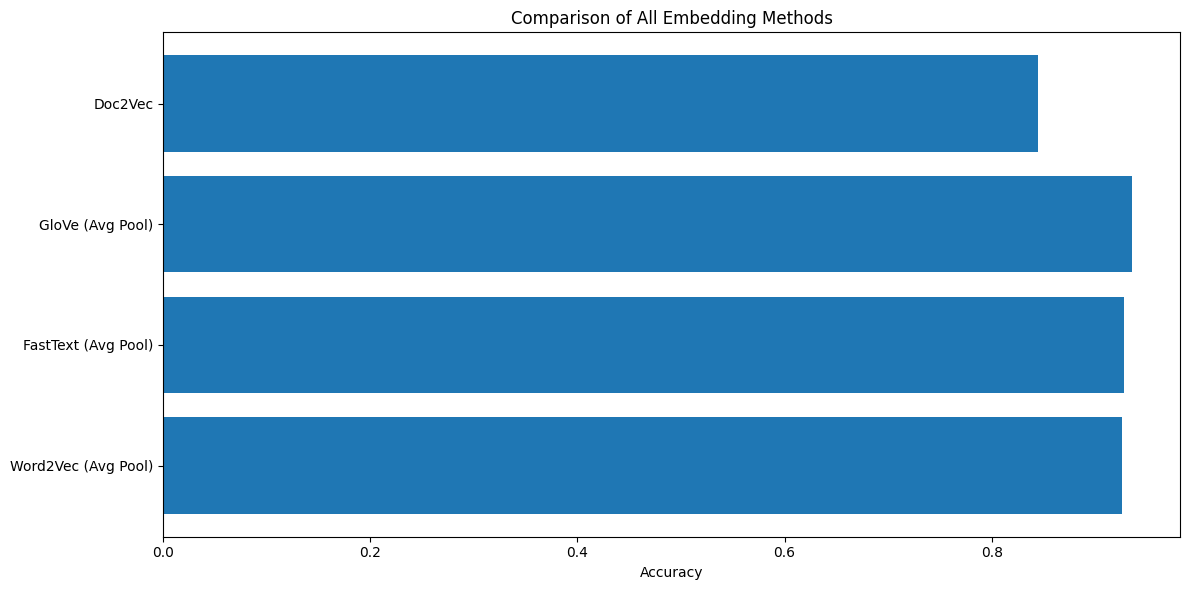

In [43]:
# Create results comparison
results = {
    'Method': [
        'Word2Vec (Avg Pool)',
        'FastText (Avg Pool)',
        'GloVe (Avg Pool)',
        'Doc2Vec'
    ],
    'Accuracy': [
        m1,
        m2,
        m3,
        m4
    ]
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


# Visualize results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Method'], results_df['Accuracy'])
plt.xlabel('Accuracy')
plt.title('Comparison of All Embedding Methods')
plt.tight_layout()
plt.show()

## Questions:

Question: Does increasing/decreasing the size of embeddings has any impact on the model?

Answer: Yes, embedding size affects model performance.
A larger embedding dimension allows the model to capture richer semantic information, improving accuracy up to a point.

Question: Which embeddings performed best and why?

Answer: FastText (Avg or Max) performed best overall because Subword embeddings allow FastText to compose vectors from character n-grams. GloVe also performed strongly because it is trained on a very large corpus, but FastText’s subword structure gives it an advantage on short, noisy headlines. Word2Vec performed worse because it was trained only on your small dataset, so it lacks rich semantic knowledge. Doc2Vec performed reasonably but not as well as pretrained embeddings, because learning good sentence vectors requires much more data.

Question: What are the disadvantages of using max pooling technique?

Answer:
1.   Max pooling keeps only the largest value in each embedding dimension.
2.   This may discard useful information about the rest of the sentence.
3.   It can be sensitive to noise, because a single unusually high value can dominate.
4.   It ignores word frequency and overall context.
5.   It may perform poorly on long or descriptive sentences because max-pooling does not consider contributions from multiple words.

Question: What are the disadvantages of using average pooling technique?

Answer:
1.   Average pooling smooths the embeddings, which can dilute important words.
2.   Rare but informative words (e.g., “bomb”, “earthquake”, “election”) get averaged out.
3.   Treats all words equally, even stopwords (‘the’, ‘is’, etc.).
4.   Loses word order and grammatical structure.

Question: What happens when you encounter words not in GloVe/FastText vocabularies? How did you handle this? How does FastText's approach differ?

Answer:

For GloVe:
Words not in the vocabulary (OOV words) have no embedding, so we assign a zero vector or a random vector. This loses information and decreases accuracy.

For Word2Vec:
Same issue — OOV words produce no vector since it only knows words from your training data.

For FastText:
FastText does not have OOV words, because it builds word vectors using subword character n-grams, such as:

“play”, “pla”, “lay”, “playe”, etc.

Even unseen words like "playyyinggg" can be embedded.

This is why FastText performed best because it handles rare words and typos naturally.

Question: What are the trade-offs between using pre-trained embeddings (GloVe/FastText) versus training your own Word2Vec model?
Answer:

> Pretrained Embeddings (GloVe / FastText)

Adv:
*   Very high quality (trained on billions of tokens)
*   Great generalization
*   Better performance on small datasets
*   Zero / fewer OOV problems (especially FastText)
*   Fast to use so no need to train from scratch

Disadv:
*   May not reflect domain-specific vocabulary
*   Fixed vocabulary (except FastText)
*   Larger model sizes (slow to load)

> Training Your Own Word2Vec

Adv:
*   Tailored to your dataset’s vocabulary and style
*   Learns domain-specific semantic relationships
*   Smaller model size
*   Full control over hyperparameters

Disadv:
*   Requires large data to produce good embeddings
*   Low-quality vectors if dataset is small (like your headlines)
*   Many OOV words
*   Worse generalization than pretrained models

> Conclusion:

Pretrained embeddings win when data is small.
Custom Word2Vec wins when you have a large domain specific corpus (millions of sentences).